## Importing necessary packages

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading the data
df=pd.read_csv('mental_health_data.csv')

In [3]:
# Checking the count of posts from Various Subreddits
df['subreddit'].value_counts()

BPD                   1961
mentalhealth          1897
depression            1844
SuicideWatch          1830
CasualConversation    1782
Anxiety               1769
bipolar               1492
Name: subreddit, dtype: int64

In [4]:
#Checking for NA values
df.isna().sum()

Unnamed: 0         0
title              0
body             316
author          1075
url                0
score              0
upvote_ratio       0
subreddit          0
dtype: int64

In [5]:
# Filtering out rows where the body is null
df[df['body'].isna()]

,Unnamed: 0,title,body,author,url,score,upvote_ratio,subreddit
11,11,LPT: Learn to distance yourself from your thou...,NaN,ChillingInChai,/r/LifeProTips/comments/n3loxq/lpt_learn_to_di...,2,1.00,mentalhealth
72,72,Lifelong neglect and abuse has led me unable t...,NaN,Ctantkeeper,/r/selfimprovement/comments/n3h3vv/lifelong_ne...,2,1.00,mentalhealth
213,213,Loving again,NaN,hrundiskel,/r/relationship_advice/comments/n3epx7/do_you_...,1,1.00,mentalhealth
255,255,"My mum is emotionally, verbally and at times p...",NaN,JackDoe1324,/r/domesticviolence/comments/n30v3n/my_mum_is_...,5,0.86,mentalhealth
260,260,I’m so scared,NaN,robsie123,/r/Paranoia/comments/n39e1m/im_so_scared/,1,1.00,mentalhealth
...,...,...,...,...,...,...,...,...
5312,5312,Is hanging the easiest and least painful way t...,NaN,PaceJust,https://www.reddit.com/r/SuicideWatch/comments...,2,1.00,SuicideWatch
5325,5325,I suffer from severe hyperacusis and Tinnitus....,NaN,Acceptable_Slide_667,https://www.reddit.com/r/SuicideWatch/comments...,3,1.00,SuicideWatch
5341,5341,My boyfriend of four years dumped me. My best ...,NaN,Ahunteriwillbe,https://www.reddit.com/r/SuicideWatch/comments...,3,0.80,SuicideWatch
5353,5353,My fiance is about to dump me,NaN,Throwaway2710383952,https://www.reddit.com/r/SuicideWatch/comments...,2,1.00,SuicideWatch


In [6]:
# adding a new column combining title and body of the post
df = df[~((df['body'].isna()) & (df['subreddit'].isin(['bipolar', 'mentalhealth'])))].reset_index().drop('index', axis=1)

df.fillna('', inplace=True)

df['full_text'] = df['title'] + " " + df['body']

In [7]:
# Grouping the posts based on author to check for multiple posts from the same author
author = df.groupby(['subreddit','author']).count()

In [8]:
# Checking authors having posts with high scores(Checking for popularity of posts)
authors_top_score = df[df['subreddit']=="mentalhealth"].groupby(['author']).score.mean().sort_values(ascending = False)[:20].index
authors_top_score

Index(['Crafty_n_depressed44', 'Emmengard', 'notoriu5', 'aristotlesbitch4561',
       'StubbornElephant85', 'StarZealousideal2312', 'An0nymous-T',
       'immedicable', 'StrugglingYoungDad', 'Unavoidable-Mango',
       'JusAnotherWaste', 'averageschill', 'CuddleDogsDaily', 'expat_mel',
       'strugglingbitch', 'WhiteWhiteBlackOne', 'fartonme', 'iamdream',
       'zSadArtist', 'Echeveria1987'],
      dtype='object', name='author')

In [9]:
# Calculating mean of scores for subreddits
df[df['subreddit']=="mentalhealth"].groupby(['author']).score.mean().sort_values(ascending = False)[:20]

author
Crafty_n_depressed44    2717.0
Emmengard               1958.0
notoriu5                1764.0
aristotlesbitch4561     1580.0
StubbornElephant85      1553.0
StarZealousideal2312    1503.0
An0nymous-T             1488.0
immedicable             1297.0
StrugglingYoungDad      1292.0
Unavoidable-Mango       1280.0
JusAnotherWaste         1233.0
averageschill           1175.0
CuddleDogsDaily         1150.0
expat_mel               1117.0
strugglingbitch         1050.0
WhiteWhiteBlackOne      1049.0
fartonme                1028.0
iamdream                1017.0
zSadArtist               997.0
Echeveria1987            994.0
Name: score, dtype: float64

In [10]:
# Printing one of the post with a high score to check for the content
for i in authors_top_score:
  print(df[df['author']=="mothsandhoneydew"]['body'].iloc[0])
  break

Today I'm glad I'm alive.  

I stared a new antidepressant, and I feel okay. 

 My sweet coworker (who I don't know too well) asked me excitedly when I was working with her next 

My friends were happy and seemed mentally healthy, after many weeks of uphill battles (very proud of them).

I went on a picnic during lunch break with them. It felt good to sit in the grass and see them smile 

I came out gently to one of my friends and it was very casual, loving, and well recieved. 

I spent some good quality time with my mom. 

I am set up to get a cat tomorrow! This is big for me, and was my only motivation to live so it brings me happiness to see it coming together. It makes me feel like I should be alive.


In [11]:
# Performing Reddit specific preprocessing to remove the markdown formatting
import re
def reddit_specific_preprocessing(text):

    # Remove newlines (one or more)
    text = re.sub(r'\n+', ' ', text)

    # Remove quotes
    text = re.sub(r'\"?\\?&?gt;?', '', text)

    # Remove asterisk
    text = re.sub(r'\*', '', text)

    # Remove bullet points
    text = re.sub('&amp;#x200B;', '', text)

    # Remove links (always enclosed between parenthesis)
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)

    # Remove strikethroughs
    text = re.sub('~', '', text)

    # Remove spoilers, which is used with < less-than (Preserves the text)
    text = re.sub('&lt;', '', text)
    text = re.sub(r'!(.*?)!', r'\1', text)

    # Code, inline and block
    text = re.sub('`', '', text)

    # Superscript (Preserves the text)
    text = re.sub(r'\^\((.*?)\)', r'\1', text)

    # Table
    text = re.sub(r'\|', ' ', text)
    text = re.sub(':-', '', text)

    # Heading
    text = re.sub('#', '', text)

    # Clean white spaces
    text = text.strip()
    text = re.sub(r'\s\s+', ' ', text)

    return text

In [12]:
# Preparing a subset of the data and storing it in a new dataframe
df_preprocessing = df[["subreddit", 'url', 'full_text']].copy()

In [13]:
# Applying reddit specific preprocessing
df_preprocessing['01_reddit_specific'] = df_preprocessing['full_text'].apply(lambda text: reddit_specific_preprocessing(text))

In [14]:
# Printing out a message
df_preprocessing['01_reddit_specific'][0]

'Craving closeness About a year ago, I got into a relationship that lasted until December 2020. I was the one that broke up. I loved her, but I didn’t see a satisfying future for me, so it was a tough decision to make. The problem is that I now really crave the closeness I had with her, cause I don’t really get that with anyone else. I want the love we had for each other with someone else, and it’s really annoying. I want the spooning, the sex, everything. I’m only 18, so it’s probably not something I should be thinking about, but I do. Is this normal, or should I seek help?'

In [15]:
# Importing nltk package
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
# Implementing a function to perform stopword removal, removing punctuations and performing lemmatization
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import nltk
nltk.download('wordnet')
def clean_message(message):
    '''
    Input:
        message: a string containing a message.
    Output:
        messages_cleaned: a list of words containing the processed message.

    '''
    stem = PorterStemmer()
    lemma = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))
    messages_cleaned = []
    message = word_tokenize(message)
    for i in message:

        if i.lower() not in stop_words and i.isalnum():
                messages_cleaned.append(re.sub(r'http\S+', '', lemma.lemmatize(i.lower())))

    return " ".join(messages_cleaned)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
# applying the clean_message function to the text
df_preprocessing['cleaned_text'] = df_preprocessing["01_reddit_specific"].apply(clean_message)


In [19]:
# Installing langdetect package
!pip install langdetect

In [20]:
# Calculating the count of posts from various languages
import langdetect

l=[]
for i in range(len(df_preprocessing)):
    try:
        l.append(langdetect.detect(df_preprocessing["cleaned_text"].iloc[i]))
    except:
        pass

In [21]:
count = 0
index = []
for i in range(len(l)):
    if l[i] == 'en':
        index.append(i)
        count+=1
    else:
        pass

In [22]:
df_preprocessing

,subreddit,url,full_text,01_reddit_specific,cleaned_text
0,mentalhealth,https://www.reddit.com/r/mentalhealth/comments...,"Craving closeness About a year ago, I got into...","Craving closeness About a year ago, I got into...",craving closeness year ago got relationship la...
1,mentalhealth,https://www.reddit.com/r/mentalhealth/comments...,Mental health class I think schools should hav...,Mental health class I think schools should hav...,mental health class think school mandatory men...
2,mentalhealth,https://www.reddit.com/r/mentalhealth/comments...,My 7yo son accidentally fell on our pet bird a...,My 7yo son accidentally fell on our pet bird a...,7yo son accidentally fell pet bird killed 11 y...
3,mentalhealth,https://www.reddit.com/r/mentalhealth/comments...,Who else doesn’t want covid world to leave My ...,Who else doesn’t want covid world to leave My ...,else want covid world leave mental health bad ...
4,mentalhealth,https://www.reddit.com/r/mentalhealth/comments...,my mental health is suffering due to my contro...,my mental health is suffering due to my contro...,mental health suffering due controlling toxic ...
...,...,...,...,...,...
12326,mentalhealth,https://www.reddit.com/r/mentalhealth/comments...,It’s been 10 years since my suicide attempt an...,It’s been 10 years since my suicide attempt an...,10 year since suicide attempt glad succeed som...
12327,mentalhealth,https://www.reddit.com/r/mentalhealth/comments...,"I’m 1,000 days clean from self harm today Tech...","I’m 1,000 days clean from self harm today Tech...",day clean self harm today technically yesterda...
12328,mentalhealth,https://www.reddit.com/r/mentalhealth/comments...,I Got Out of Bed and Ate Today I have clinical...,I Got Out of Bed and Ate Today I have clinical...,got bed ate today clinical depression anxiety ...
12329,mentalhealth,https://www.reddit.com/r/mentalhealth/comments...,a woman waved at me and smiled at walmart and ...,a woman waved at me and smiled at walmart and ...,woman waved smiled walmart made happy


In [23]:
# Keeping only posts in English
df_english = df_preprocessing.iloc[index]
df = df_english[["subreddit","url","cleaned_text"]]

In [24]:
df = df_english[["subreddit","url","cleaned_text"]]

In [25]:
df.to_csv('data_preprocessed.csv')

## Vectorizing the posts

In [26]:
# Vectorizing the posts using Count Vectorizer and TFidf Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer()
X_cv = cv.fit_transform(df['cleaned_text'])
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

In [27]:
df['subreddit'].value_counts()

BPD                   1954
mentalhealth          1868
depression            1822
CasualConversation    1776
SuicideWatch          1765
Anxiety               1747
bipolar               1239
Name: subreddit, dtype: int64

In [28]:
# Storing a list of tokens
df["list"] = df["cleaned_text"].str.split(" ")

<ipython-input-28-58c27a2399b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["list"] = df["cleaned_text"].str.split(" ")


In [29]:
# Giving labels to the subreddit column
df['subreddit_labels'] = df['subreddit'].map({'BPD':0,'mentalhealth':1,"Anxiety":2,"SuicideWatch":3,"depression":4,"CasualConversation":5,"bipolar":6})

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer()
X_cv = cv.fit_transform(df['cleaned_text'])
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

In [31]:
y = df["subreddit_labels"]

In [32]:
#X_cv.toarray()
X_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
cv

CountVectorizer()

In [34]:
len(cv.get_feature_names_out())

24706

In [35]:
X_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
print(np.any(np.isnan(X_cv.toarray())))
print(np.all(np.isfinite(X_cv.toarray())))

False
True


In [37]:
# Installing gensim package
!pip install gensim

## Word2Vec

In [38]:
# Implementing Word2vec as the previous methods were not helpful in capturing the context of the posts.
# The accuracy of the model was also pretty low.

import gensim
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'].str.split(" "),y)
from gensim.models import Word2Vec

word2vec = Word2Vec(df['cleaned_text'].str.split(" "))
vectors = word2vec.wv.get_normed_vectors()
words = set(word2vec.wv.index_to_key)
X_train_vect = np.array([np.array([word2vec.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([word2vec.wv[i] for i in ls if i in words])
                     for ls in X_test])
X_train_vect_avg = []
for v in X_train_vect:
    #print(len(v))
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))

    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

<ipython-input-38-77c35e0899ee>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vect = np.array([np.array([word2vec.wv[i] for i in ls if i in words])
<ipython-input-38-77c35e0899ee>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vect = np.array([np.array([word2vec.wv[i] for i in ls if i in words])


## TSNE

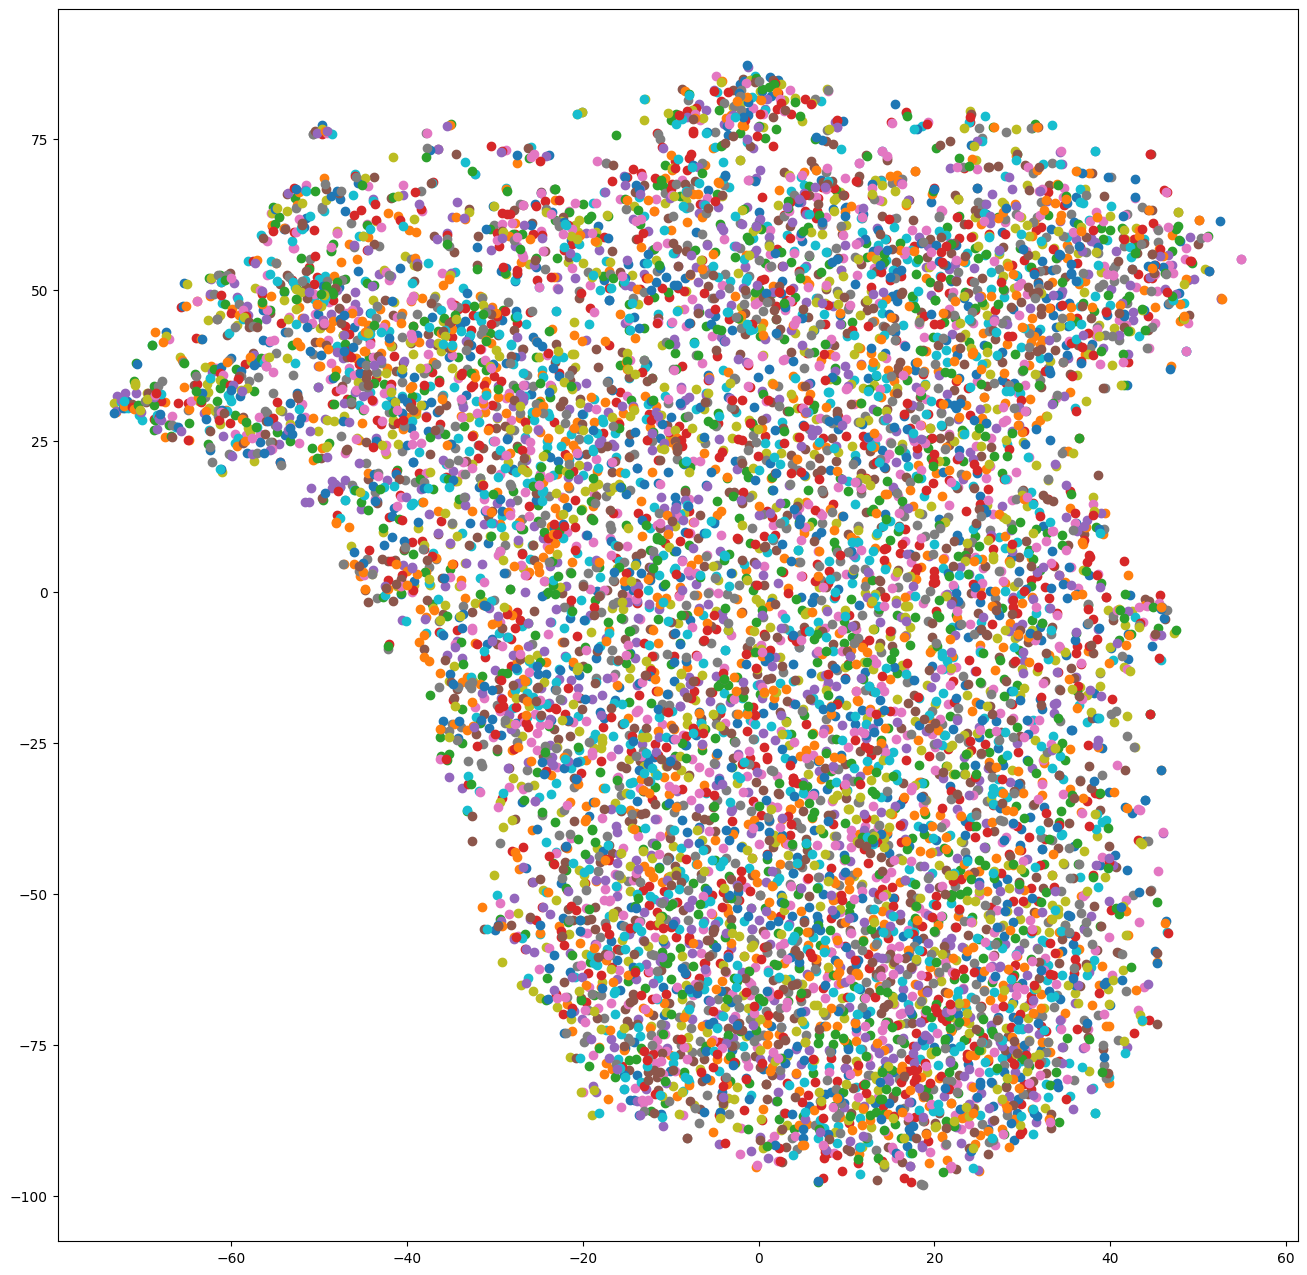

In [39]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def tsne_plot(model):
    "Creates a TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)

    # Convert tokens to a NumPy array
    tokens_array = np.array(tokens)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens_array)

    x = new_values[:, 0]
    y = new_values[:, 1]

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        #plt.annotate(labels[i],
         #            xy=(x[i], y[i]),
          #           xytext=(5, 2),
           #          textcoords='offset points',
            #         ha='right',
             #        va='bottom')
    plt.show()

# Assuming you have a trained Word2Vec model named 'word2vec'
tsne_plot(word2vec)

In [40]:
word2vec=np.array(word2vec)
print(word2vec)

Word2Vec<vocab=8949, vector_size=100, alpha=0.025>


In [41]:
# Import Sentiment Analyzer package
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [42]:
# Implementing a function to calculate polarity scores given a post.
def get_polarity(text):
    return sid.polarity_scores(text)['compound']

In [43]:
df['polarity_score'] = df['cleaned_text'].apply(get_polarity)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, 'mentalhealth'),
  Text(0.0, 0, 'Anxiety'),
  Text(1.0, 0, 'BPD'),
  Text(2.0, 0, 'CasualConversation'),
  Text(3.0, 0, 'SuicideWatch'),
  Text(4.0, 0, 'bipolar'),
  Text(5.0, 0, 'depression'),
  Text(6.0, 0, 'mentalhealth'),
  Text(7.0, 0, '')])

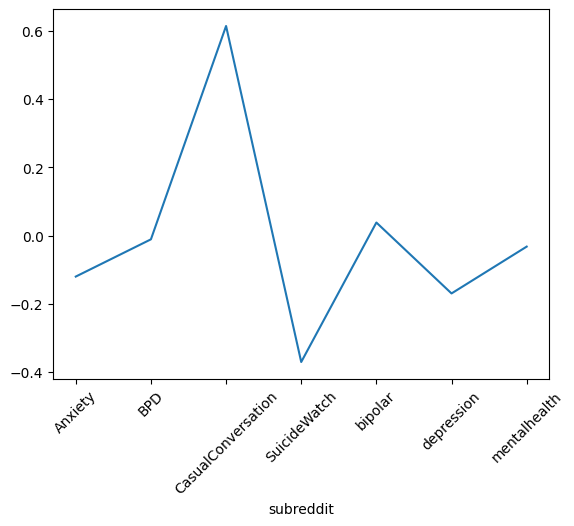

In [44]:
# Plotting the mean polarity scores among various subreddits
df.groupby('subreddit').polarity_score.mean().plot()
plt.xticks(rotation=45)

In [45]:
# Calculating the mean polarity scores among various subreddits
df.groupby('subreddit').polarity_score.mean()
# Causal Conversation
# Suicide Watch
# Anxiety

subreddit
Anxiety              -0.120199
BPD                  -0.011105
CasualConversation    0.613897
SuicideWatch         -0.370485
bipolar               0.038138
depression           -0.169621
mentalhealth         -0.032440
Name: polarity_score, dtype: float64

In [46]:
# Returning the number of unique elements in each subreddit
for i in df['subreddit'].unique():
    print("{}: {}".format(i,len(df[df['subreddit']==""+str(i)+""])))

mentalhealth: 1868
depression: 1822
Anxiety: 1747
bipolar: 1239
BPD: 1954
SuicideWatch: 1765
CasualConversation: 1776


In [47]:
#removing bipolar subreddit

df = df[df['subreddit']!="bipolar"]

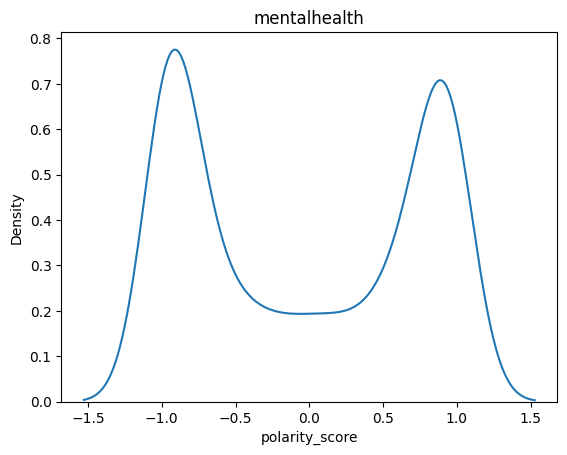

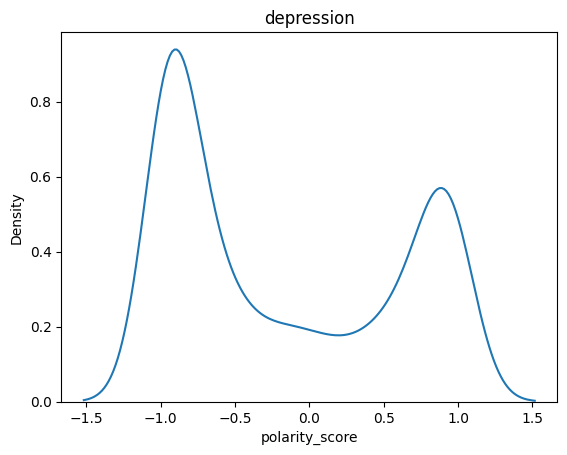

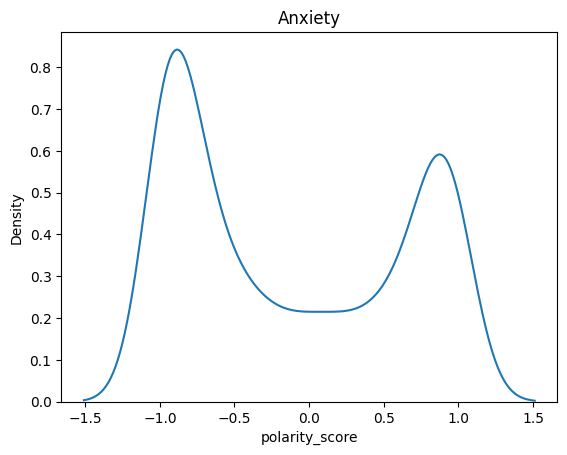

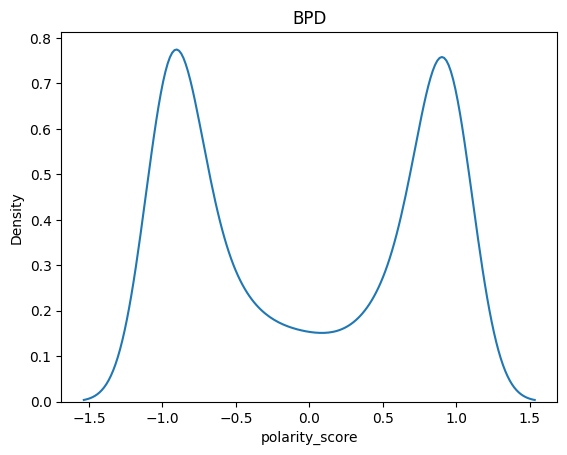

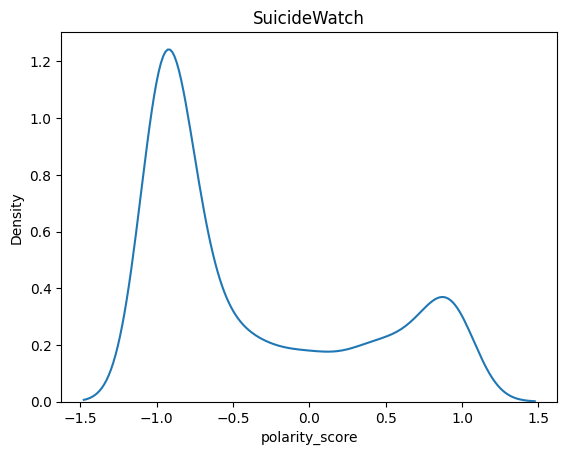

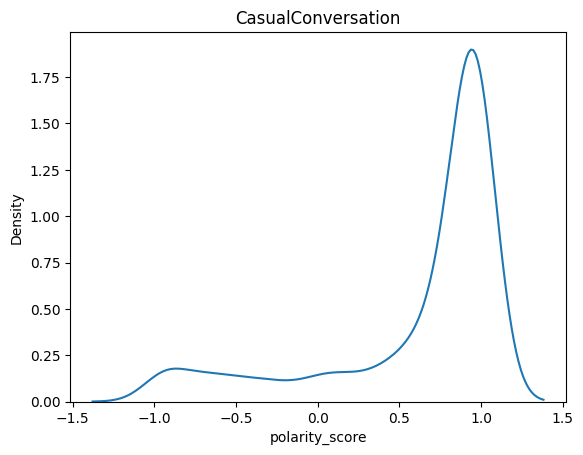

In [48]:
# Plotting the polarity scores for various subreddits
import matplotlib.pyplot as plt
import seaborn as sns
j = 1
for i in df['subreddit'].unique():#['CasualConversation','SuicideWatch','Anxiety']:
    plt.figure(j)
    sns.kdeplot(df[df['subreddit'] == ""+str(i)+""]['polarity_score'])#.plot.hist()
    plt.title(str(i))
    j+=1

In [49]:
get_polarity("hello I'm feeling sad") # from the plots - anxiety and bipolar

-0.3818

In [50]:
get_polarity("I'm dying") # bipolar - from the plots

0.0

In [51]:
# Function to return a label predicting which subreddit the given sentence might belong to.
def get_severity(text):
    from scipy.stats import gaussian_kde
    severity = ""
    max_severity = float("-inf")
    for i in df.subreddit.unique():
        kde = gaussian_kde(df[df['subreddit']==""+str(i)+""]['polarity_score'].values)
        sev = kde.evaluate([get_polarity(text)])

        if sev > max_severity:

            severity = i
            max_severity = sev

    return severity

In [52]:
# Testing with a sample sentence
get_severity("I'm Happy now")

'CasualConversation'

In [53]:
filtered= df[df['subreddit'].isin(['CasualConversation','depression','SuicideWatch'])]


In [54]:
# only casual conversation subreddit has a positive mean polarity score.
filtered.groupby('subreddit').polarity_score.mean()

subreddit
CasualConversation    0.613897
SuicideWatch         -0.370485
depression           -0.169621
Name: polarity_score, dtype: float64

In [55]:
# Performing Train-test split
y = filtered["subreddit_labels"]
X_train, X_test, y_train, y_test = train_test_split(filtered['cleaned_text'].str.split(" "),y)

In [56]:
# Loading the pre-processed data which was stored in a csv file
df = pd.read_csv("data_preprocessed.csv")

In [57]:
df.head()
df.columns

Index(['Unnamed: 0', 'subreddit', 'url', 'cleaned_text'], dtype='object')

In [58]:
topics = []
for i in range(len(df)):
    topics.append(df["url"].iloc[i].split('/')[4])

In [59]:
df.columns

Index(['Unnamed: 0', 'subreddit', 'url', 'cleaned_text'], dtype='object')

In [60]:
df["Topics"] = topics

In [61]:
df[["cleaned_text", "Topics"]]

,cleaned_text,Topics
0,craving closeness year ago got relationship la...,mentalhealth
1,mental health class think school mandatory men...,mentalhealth
2,7yo son accidentally fell pet bird killed 11 y...,mentalhealth
3,else want covid world leave mental health bad ...,mentalhealth
4,mental health suffering due controlling toxic ...,mentalhealth
...,...,...
12166,10 year since suicide attempt glad succeed som...,mentalhealth
12167,day clean self harm today technically yesterda...,mentalhealth
12168,got bed ate today clinical depression anxiety ...,mentalhealth
12169,woman waved smiled walmart made happy,mentalhealth


In [62]:
df = df.drop(columns = ["Unnamed: 0"])

In [63]:
df_req = df["cleaned_text"]

In [64]:
df_req.isnull().sum()

0

In [65]:
df_req = df_req.dropna()

In [66]:
# Forming bigrams from the sentence for further analysis
import gensim
def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
# Converting the given sentence to words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def get_corpus(df):
    words = list(sent_to_words(df))
    bigram_mod = bigrams(words)
    bigram = [bigram_mod[review] for review in words]
    id2word = gensim.corpora.Dictionary(bigram)
    id2word.filter_extremes(no_below=10, no_above=0.35)
    id2word.compactify()
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

In [67]:
df_req = df["cleaned_text"]

In [68]:
corpus_req, id2word_req, bigram_req = get_corpus(df_req)

## Latent Dirichlet Allocation

In [69]:
# Implementing Linear Dirichlet Allocation to find keywords within each topic
chunk_size = len(corpus_req) * (10/200)
lda_model = gensim.models.ldamulticore.LdaMulticore(num_topics=2,
                                       corpus=corpus_req,
                                       id2word=id2word_req,
                                       passes=10,
                                       workers= 10,
                                       chunksize = chunk_size,
                                       alpha = 0.5,
                                       random_state = 42,eval_every = 1,per_word_topics=True)

In [70]:
lda_model.print_topics(20, num_words=20)

[(0,
  '0.013*"want" + 0.011*"life" + 0.011*"people" + 0.008*"thing" + 0.008*"even" + 0.008*"feel_like" + 0.007*"time" + 0.007*"really" + 0.007*"would" + 0.007*"think" + 0.006*"make" + 0.006*"never" + 0.006*"one" + 0.006*"much" + 0.005*"day" + 0.005*"feeling" + 0.005*"way" + 0.005*"friend" + 0.005*"someone" + 0.005*"always"'),
 (1,
  '0.008*"time" + 0.008*"people" + 0.007*"one" + 0.007*"really" + 0.007*"day" + 0.006*"thing" + 0.005*"going" + 0.005*"got" + 0.005*"would" + 0.005*"even" + 0.005*"much" + 0.005*"think" + 0.004*"go" + 0.004*"anxiety" + 0.004*"year" + 0.004*"today" + 0.004*"also" + 0.004*"life" + 0.004*"make" + 0.004*"good"')]

In [71]:
for idx, topic in lda_model.print_topics(-1, num_words = 20):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.013*"want" + 0.011*"life" + 0.011*"people" + 0.008*"thing" + 0.008*"even" + 0.008*"feel_like" + 0.007*"time" + 0.007*"really" + 0.007*"would" + 0.007*"think" + 0.006*"make" + 0.006*"never" + 0.006*"one" + 0.006*"much" + 0.005*"day" + 0.005*"feeling" + 0.005*"way" + 0.005*"friend" + 0.005*"someone" + 0.005*"always"
Topic: 1 
Words: 0.008*"time" + 0.008*"people" + 0.007*"one" + 0.007*"really" + 0.007*"day" + 0.006*"thing" + 0.005*"going" + 0.005*"got" + 0.005*"would" + 0.005*"even" + 0.005*"much" + 0.005*"think" + 0.004*"go" + 0.004*"anxiety" + 0.004*"year" + 0.004*"today" + 0.004*"also" + 0.004*"life" + 0.004*"make" + 0.004*"good"


In [72]:
import regex as re
model_out = lda_model[corpus_req]
# get the topic descriptions
topic_sep = re.compile("0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + '))
                for topic_no, model_topic in
                lda_model.print_topics(num_topics=2, num_words=20)]

descriptors = []
cor_dic = {}
for i, m in model_topics:
    print(i+1, ", ".join(m[:20]))
    descriptors.append(", ".join(m[:20]).replace('"', ''))
    cor_dic[i+1] = m

1 "want", "life", "people", "thing", "even", "feel_like", "time", "really", "would", "think", "make", "never", "one", "much", "day", "feeling", "way", "friend", "someone", "always"
2 "time", "people", "one", "really", "day", "thing", "going", "got", "would", "even", "much", "think", "go", "anxiety", "year", "today", "also", "life", "make", "good"


In [73]:
print(model_topics)

[(0, ['"want"', '"life"', '"people"', '"thing"', '"even"', '"feel_like"', '"time"', '"really"', '"would"', '"think"', '"make"', '"never"', '"one"', '"much"', '"day"', '"feeling"', '"way"', '"friend"', '"someone"', '"always"']), (1, ['"time"', '"people"', '"one"', '"really"', '"day"', '"thing"', '"going"', '"got"', '"would"', '"even"', '"much"', '"think"', '"go"', '"anxiety"', '"year"', '"today"', '"also"', '"life"', '"make"', '"good"'])]


In [74]:
print(model_topics[0][1][:20])

['"want"', '"life"', '"people"', '"thing"', '"even"', '"feel_like"', '"time"', '"really"', '"would"', '"think"', '"make"', '"never"', '"one"', '"much"', '"day"', '"feeling"', '"way"', '"friend"', '"someone"', '"always"']


In [75]:
print(model_topics[0][1][:20][1:-1])

['"life"', '"people"', '"thing"', '"even"', '"feel_like"', '"time"', '"really"', '"would"', '"think"', '"make"', '"never"', '"one"', '"much"', '"day"', '"feeling"', '"way"', '"friend"', '"someone"']


In [76]:
import random
from gensim.models.phrases import Phrases, Phraser
import gensim.corpora
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases, Phraser
from gensim import corpora, models
def generate_topics(num_topics, df = df["cleaned_text"].copy()):

    import gensim
    def bigrams(words, bi_min=15, tri_min=10):
        bigram = gensim.models.Phrases(words, min_count = bi_min)
        bigram_mod = gensim.models.phrases.Phraser(bigram)
        return bigram_mod

    def sent_to_words(sentences):
        for sentence in sentences:
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

    def get_corpus(df):
        words = list(sent_to_words(df))
        bigram_mod = bigrams(words)
        bigram = [bigram_mod[review] for review in words]
        id2word = gensim.corpora.Dictionary(bigram)
        id2word.filter_extremes(no_below=10, no_above=0.35)
        id2word.compactify()
        corpus = [id2word.doc2bow(text) for text in bigram]
        return corpus, id2word, bigram

    corpus_req, id2word_req, bigram_req = get_corpus(df_req)


    lda_train = gensim.models.ldamulticore.LdaMulticore(
                           corpus=corpus_req,
                           num_topics=2,
                           id2word=id2word_req,
                           chunksize=100,
                           workers=9,
                           passes=50,
                           eval_every = 1,
                           per_word_topics=True)


    # transform the data into topic distros
    topic_corpus = lda_train[corpus_req]

    # get the topic descriptions
    topic_sep = re.compile("0\.[0-9]{3}\*") # getting rid of useless formatting
    # extract a list of tuples with topic number and descriptors from the model
    model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + '))
                    for topic_no, model_topic in
                    lda_train.print_topics(num_topics=num_topics, num_words=20)]

    descriptors = []
    for i, m in model_topics:
        print(i+1, ", ".join(m[:10]))
        descriptors.append(", ".join(m[:10]).replace('"', ''))

    return model_topics

In [77]:
# Performing cleaning on the topics
def clean_topics(topics):

    topic_1 = []

    for t in topics[0][1][:20]:
        topic_1.append(t[1:-1])

    topic_2 = []

    for t in topics[1][1][:20]:
        topic_2.append(t[1:-1])

    topic_mixed = list(set(topic_1) & set(topic_2))

    return topic_1, topic_2, topic_mixed

In [78]:
len(model_topics)

2

In [79]:
data = df['cleaned_text'].copy()
data = data.dropna()
data = data.sample(frac=1)

n_splits = 5
N = len(data)
size = int(N*(1/n_splits))

data_split_list = []

for i in range(n_splits):

    start_index = i*size
    end_index = (i+1)*size

    data_i = data[start_index:end_index]

    data_split_list.append(data_i)

In [80]:
t1, t2, tm = clean_topics(model_topics)

In [81]:
# checking for good topics
def check_good_topics(topic_1, topic_2, topic_mixed, topic_pilar = 'depression'):

    dict_topic = dict()

    if topic_pilar in topic_mixed:
        return dict_topic

    if topic_pilar not in topic_1+topic_2:
        return dict_topic

    if topic_pilar in topic_1:
        dict_topic['topic_1'] = 'A'
        dict_topic['topic_2'] = 'B'

    else:
        dict_topic['topic_1'] = 'B'
        dict_topic['topic_2'] = 'A'

    return dict_topic

In [82]:
check_good_topics(t1, t2, tm, topic_pilar = "anxiety")

{'topic_1': 'B', 'topic_2': 'A'}

In [83]:
def build_n_topic_models(n_splits=n_splits, num_topics=2):
    for i in range(n_splits):

        good_current_topic = False

        while not good_current_topic:

            print(f"Start iteration for topic number {i+1}")

#             topics = generate_topics(num_topics)

            # TODO: generate topics on the subset of the df to get context?
            topics = generate_topics(num_topics, data_split_list[i])

            topic_1, topic_2, topic_mixed = clean_topics(topics)
            dict_topic = check_good_topics(topic_1, topic_2, topic_mixed, topic_pilar = 'anxiety')

            if not dict_topic:
                print(f"\tCURRENT ITERATION FAILED: start again")

            else:
                good_current_topic = True
                print(f"\tDone")
                yield (topic_1, topic_2, topic_mixed, dict_topic)

In [84]:
topic_models = [(t1, t2, tm, dict_topic)
                for (t1, t2, tm, dict_topic) in build_n_topic_models(5)]

Start iteration for topic number 1
1 "people", "want", "life", "thing", "feel_like", "even", "think", "make", "time", "really"
2 "day", "got", "time", "one", "really", "year", "would", "today", "going", "go"
	CURRENT ITERATION FAILED: start again
Start iteration for topic number 1
1 "people", "want", "life", "thing", "feel_like", "think", "even", "really", "make", "time"
2 "day", "time", "one", "got", "would", "really", "going", "year", "go", "today"
	Done
Start iteration for topic number 2
1 "day", "time", "got", "one", "really", "year", "would", "today", "going", "work"
2 "people", "want", "life", "thing", "feel_like", "even", "think", "make", "really", "time"
	Done
Start iteration for topic number 3
1 "day", "got", "time", "one", "really", "would", "year", "today", "going", "go"
2 "people", "want", "life", "thing", "feel_like", "even", "think", "make", "time", "really"
	CURRENT ITERATION FAILED: start again
Start iteration for topic number 3
1 "people", "want", "life", "thing", "fee

In [85]:
def get_data(df, topic_model):

    topic_1, topic_2, topic_mixed, dict_topic = topic_model

    for post in df:

        words = []
        tags = []

        for word in post.split():

            if word in topic_mixed:

                # if in both topics, return a random tag
                tag = random.choice(list(dict_topic.values()))

            elif word in topic_1:
                tag = dict_topic['topic_1']

            elif word in topic_2:
                tag = dict_topic['topic_2']

            else:
                tag = '0'

            words.append(word)
            tags.append(tag)

        yield (words, tags)

In [86]:
instances_list = []

for i in range(n_splits):

    df_split = data_split_list[i]
    topic_model = topic_models[i]

    instances = [(words, tags) for (words, tags) in get_data(df_split, topic_model)]
    instances_list.append(instances)

In [87]:
train = instances_list[0]+instances_list[2]+instances_list[4]
test = instances_list[1]+instances_list[3]

In [88]:
# collect known word tokens and tags

wordset, tagset = set(), set()
train_instances = train
for (words, tags) in train_instances:
    tagset.update(set(tags))
    wordset.update(set(words))

# map words and tags into ints
PAD = '-PAD-'
UNK = '-UNK-'
word2int = {word: i + 2 for i, word in enumerate(sorted(wordset))}
word2int[PAD] = 0  # special token for padding
word2int[UNK] = 1  # special token for unknown words

tag2int = {tag: i + 1 for i, tag in enumerate(sorted(tagset))}
tag2int[PAD] = 0
# to translate it back
int2tag = {i:tag for tag, i in tag2int.items()}


def convert2ints(instances):
    result = []
    for (words, tags) in instances:
        # replace words with int, 1 for unknown words
        word_ints = [word2int.get(word, 1) for word in words]
        # replace tags with int
        tag_ints = [tag2int[tag] for tag in tags]
        result.append((word_ints, tag_ints))
    return result

In [89]:
# get some test data
test_instances = test

# apply integer mapping
train_instances_int = convert2ints(train)
test_instances_int = convert2ints(test)

# separate the words from the tags
train_sentences, train_tags = zip(*train_instances_int)
test_sentences, test_tags = zip(*test_instances_int)

print(train_instances[1][0])
print(train_sentences[0])
print(train_instances[0][1])
print(train_tags[0])

['therapist', 'ended', 'making', 'feel', 'worse', 'tw', 'whole', 'week', 'drag', 'feeling', 'low', 'even', 'suicidal', 'thought', 'month', 'since', 'first', 'psychologist', 'appointment', 'longest', 'wait', 'rollercoaster', 'emotion', 'mood', 'change', 'super', 'excited', 'see', 'get', 'help', 'day', 'come', 'better', 'mood', 'day', 'questioning', 'whether', 'anyone', 'even', 'cared', 'much', 'leaving', 'earth', 'would', 'better', 'get', 'nothing', 'talking', 'talking', 'writing', 'book', 'breathing', 'mum', 'stuck', 'another', 'country', 'covids', 'hit', 'hard', 'dad', 'dying', 'writing', 'helped', 'ultimately', 'triggered', 'good', 'relationship', 'dad', 'head', 'hurt', 'end', 'brain', 'started', 'zoning', 'talking', 'felt', 'drained', 'left', 'worse', 'came', 'feeling', 'like', 'helped', 'feeling', 'like', 'session', 'wasted', 'feeling', 'like', 'back', 'square', 'one', 'ended', 'cry', 'waited', 'bus', 'arrive', 'wait', 'another', 'month', 'see', 'worried', 'feel', 'like', 'year', '

In [90]:
# get longest training sentence and add 5
MAX_LENGTH = len(max(train_sentences, key=len)) + 5
print(MAX_LENGTH)

2553


In [91]:
from keras.preprocessing.sequence import pad_sequences

# add special padding at the end of every instance, up to MAX_LENGTH
train_sentences = pad_sequences(train_sentences, maxlen=MAX_LENGTH, padding='post')
test_sentences = pad_sequences(test_sentences, maxlen=MAX_LENGTH, padding='post')
train_tags = pad_sequences(train_tags, maxlen=MAX_LENGTH, padding='post')
test_tags = pad_sequences(test_tags, maxlen=MAX_LENGTH, padding='post')

print(train_sentences[0])
print(train_tags[0])

[17214  3862  6599 ...     0     0     0]
[1 1 1 ... 0 0 0]


## LSTM

In [92]:
# Importing necessary packages
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation
from keras.models import Model
from keras.layers import Input, Embedding
from keras.layers import Bidirectional, LSTM
from keras.layers import Dropout, Dense, Activation

In [93]:
# Implementing LSTM model to classify the severity of the posts.
model = Sequential()

model.add(Input((MAX_LENGTH, ), name='word_IDs'))
model.add(Embedding(input_dim=len(word2int), output_dim=128, mask_zero=True))

model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(LSTM(256,return_sequences=True))
model.add(Dropout(0.5))
model.add(Dense(len(tag2int), activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2553, 128)         2546944   
                                                                 
 batch_normalization (Batch  (None, 2553, 128)         512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 2553, 128)         0         
                                                                 
 dropout (Dropout)           (None, 2553, 128)         0         
                                                                 
 lstm (LSTM)                 (None, 2553, 256)         394240    
                                                                 
 dropout_1 (Dropout)         (None, 2553, 256)         0         
                                                        

In [94]:
test_tags

array([[1, 1, 3, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 3, 1, ..., 0, 0, 0],
       [1, 3, 2, ..., 0, 0, 0]], dtype=int32)

In [95]:

train_tags_1hot = to_categorical(train_tags, len(tag2int))
test_tags_1hot = to_categorical(test_tags, len(tag2int))

# originally 50 tag IDs
print(train_tags[0])
# now 50 rows with 13 columns
print(train_tags_1hot[0].shape)
# the 1-hot encoding of tag ID 7
print(train_tags_1hot[0])


[1 1 1 ... 0 0 0]
(2553, 4)
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [96]:
train_sentences.shape

(7302, 2553)

In [97]:
train_tags_1hot.shape

(7302, 2553, 4)

In [98]:
batch_size = 16
epochs = 5

# # compile the model we have defined above
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# run training and capture ouput log
history = model.fit(train_sentences, train_tags_1hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3)

Epoch 1/5
320/320 [==============================] - 41s 105ms/step - loss: 0.1679 - accuracy: 0.9181 - val_loss: 0.2737 - val_accuracy: 0.9093
Epoch 2/5
320/320 [==============================] - 22s 68ms/step - loss: 0.1083 - accuracy: 0.9322 - val_loss: 0.1324 - val_accuracy: 0.9265
Epoch 3/5
320/320 [==============================] - 15s 48ms/step - loss: 0.1054 - accuracy: 0.9331 - val_loss: 0.1364 - val_accuracy: 0.9216
Epoch 4/5
320/320 [==============================] - 13s 42ms/step - loss: 0.1034 - accuracy: 0.9363 - val_loss: 0.1331 - val_accuracy: 0.9282
Epoch 5/5
320/320 [==============================] - 12s 39ms/step - loss: 0.1013 - accuracy: 0.9398 - val_loss: 0.1320 - val_accuracy: 0.9201


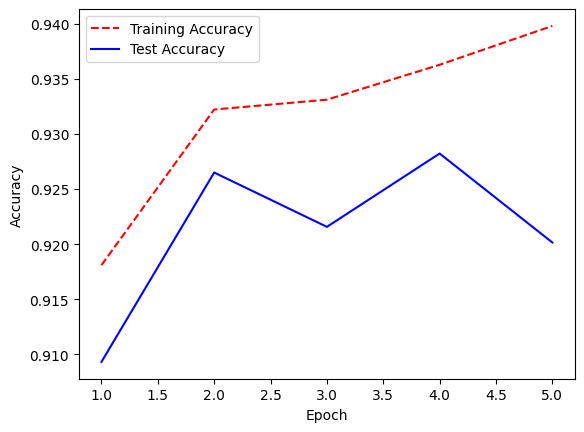

In [99]:
from matplotlib import pyplot as plt
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize loss history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

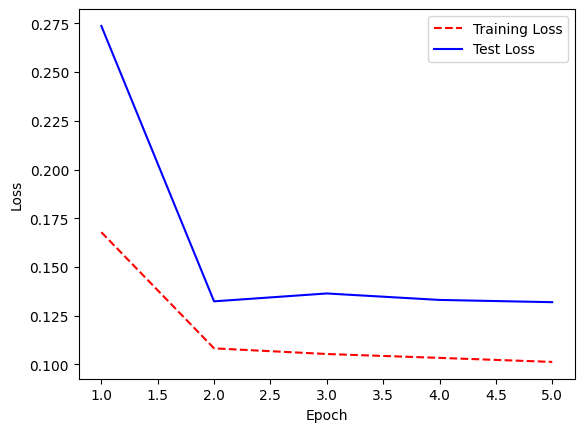

In [100]:
from matplotlib import pyplot as plt
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [101]:
from transformers import BertTokenizer, BertForSequenceClassification
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss
from transformers import AdamW, get_linear_schedule_with_warmup
import numpy as np
from tqdm import tqdm

In [102]:
# Tokenize using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Convert integer sequences back to text
train_texts = [tokenizer.decode(seq, skip_special_tokens=True) for seq in train_sentences.tolist()]
test_texts = [tokenizer.decode(seq, skip_special_tokens=True) for seq in test_sentences.tolist()]

# Tokenize using BERT tokenizer
train_encodings = tokenizer(train_texts, truncation=True, padding='max_length',max_length=512)
test_encodings = tokenizer(test_texts, truncation=True, padding='max_length',max_length=512)

KeyboardInterrupt: ignored

In [ ]:
# Convert to PyTorch tensors
train_input_ids = torch.tensor(train_encodings['input_ids'])
test_input_ids = torch.tensor(test_encodings['input_ids'])
train_attention_masks = torch.tensor(train_encodings['attention_mask'])
test_attention_masks = torch.tensor(test_encodings['attention_mask'])
train_tags = torch.tensor(train_tags)
test_tags = torch.tensor(test_tags)

In [ ]:
print(len(train_input_ids), len(train_attention_masks), len(train_tags))
print(train_input_ids.shape, train_attention_masks.shape, train_tags.shape)

In [ ]:
# If you want to split the dataset into training and validation sets
train_size = int(0.8 * min_samples)
val_size = min_samples - train_size

In [ ]:
# Determine the minimum number of samples among the tensors
min_samples = min(train_input_ids.size(0), train_attention_masks.size(0), train_tags.size(0))

# Trim the tensors to have the same number of samples
train_input_ids = train_input_ids[:min_samples]
train_attention_masks = train_attention_masks[:min_samples]
train_tags = train_tags[:min_samples]

# Create a TensorDataset
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_tags)
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])
test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_tags)


In [ ]:
if len(train_dataset) % batch_size != 0:
    # Adjust the size of the training dataset to make it divisible by the batch size
    new_size = (len(train_dataset) // batch_size) * batch_size
    train_dataset, _ = random_split(train_dataset, [new_size, len(train_dataset) - new_size])

In [ ]:
# Define DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [ ]:
#Define the BERT model for sequence classification
num_classes = 6
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

In [ ]:
# Define optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

In [ ]:
# Define loss function
loss_fn = CrossEntropyLoss()

In [ ]:
# Training loop
for epoch in range(5):
    model.train()
    total_loss = 0.0
    for batch in tqdm(train_dataloader, desc="Epoch {}".format(epoch + 1)):
        input_ids, attention_mask, labels = batch
        print(f"Input IDs Shape: {input_ids.shape}, Attention Mask Shape: {attention_mask.shape}, Labels Shape: {labels.shape}")
        optimizer.zero_grad()

        # Use model outputs without labels during training
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Assuming labels are one-hot encoded, adjust this based on your actual data structure
        loss = BCEWithLogitsLoss()(logits, labels.float())

        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Average Training Loss: {avg_train_loss}")

    # Validation loop
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in tqdm(val_dataloader, desc="Validation"):
            input_ids, attention_mask, labels = batch
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            # Assuming labels are one-hot encoded, adjust this based on your actual data structure
            loss = BCEWithLogitsLoss()(logits, labels.float())

            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_dataloader)
    print(f"Average Validation Loss: {avg_val_loss}")